# Project One: 직접 고른 이미지로 SRGAN TEST

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras import layers, Sequential

(706, 706, 3)


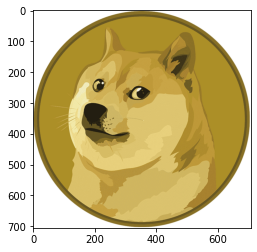

In [ ]:
# 1. 이미지 불러오기
org_img1_path = os.getenv('HOME') + '/aiffel/super_resolution/dogecoin.png'
org_img1 = cv2.imread(org_img1_path)

print(org_img1.shape)
plt.imshow(cv2.cvtColor(org_img1, cv2.COLOR_BGR2RGB))

(176, 176, 3)


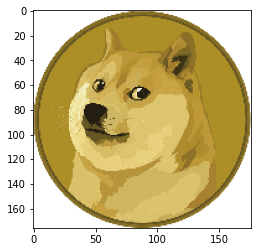

In [ ]:
# 2. bicubic interpolation 적용하여 가로세로 픽셀 수 1/4로 줄이기
y, x = int(org_img1.shape[0]*0.25), int(org_img1.shape[1]*0.25)
input_img1 = cv2.resize(
    org_img1, 
    dsize=(0, 0),
    fx=0.25,
    fy=0.25,
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

# 저해상도 이미지 시각화
print(input_img1.shape)
plt.imshow(cv2.cvtColor(input_img1, cv2.COLOR_BGR2RGB))

## SRGAN 생성하기

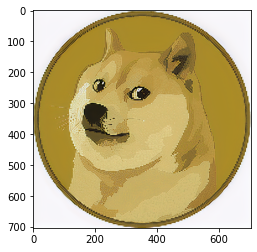

In [ ]:
# 3. SRGAN 이용해 고해상도 이미지 생성

model_file = os.getenv('HOME')+'/aiffel/super_resolution/srgan_G.h5'
srgan = tf.keras.models.load_model(model_file)

# 저해상도 이미지(bicubic_img)를 입력으로 고해상도 이미지 생성
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

srgan_img1 = apply_srgan(input_img1)
plt.imshow(cv2.cvtColor(srgan_img1, cv2.COLOR_BGR2RGB))

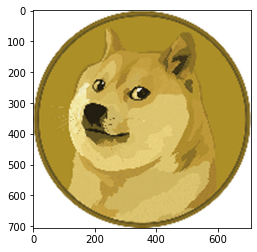

In [ ]:
# 4. bicubic interpolation 적용하여 다시 4배로 늘림!
bicubic_img1 = cv2.resize(
    input_img1, 
    dsize=(org_img1.shape[1], org_img1.shape[0]),
    interpolation=cv2.INTER_CUBIC # bicubic 설정!
)

plt.imshow(cv2.cvtColor(bicubic_img1, cv2.COLOR_BGR2RGB))

## 이미지 최대 시각화 시키기

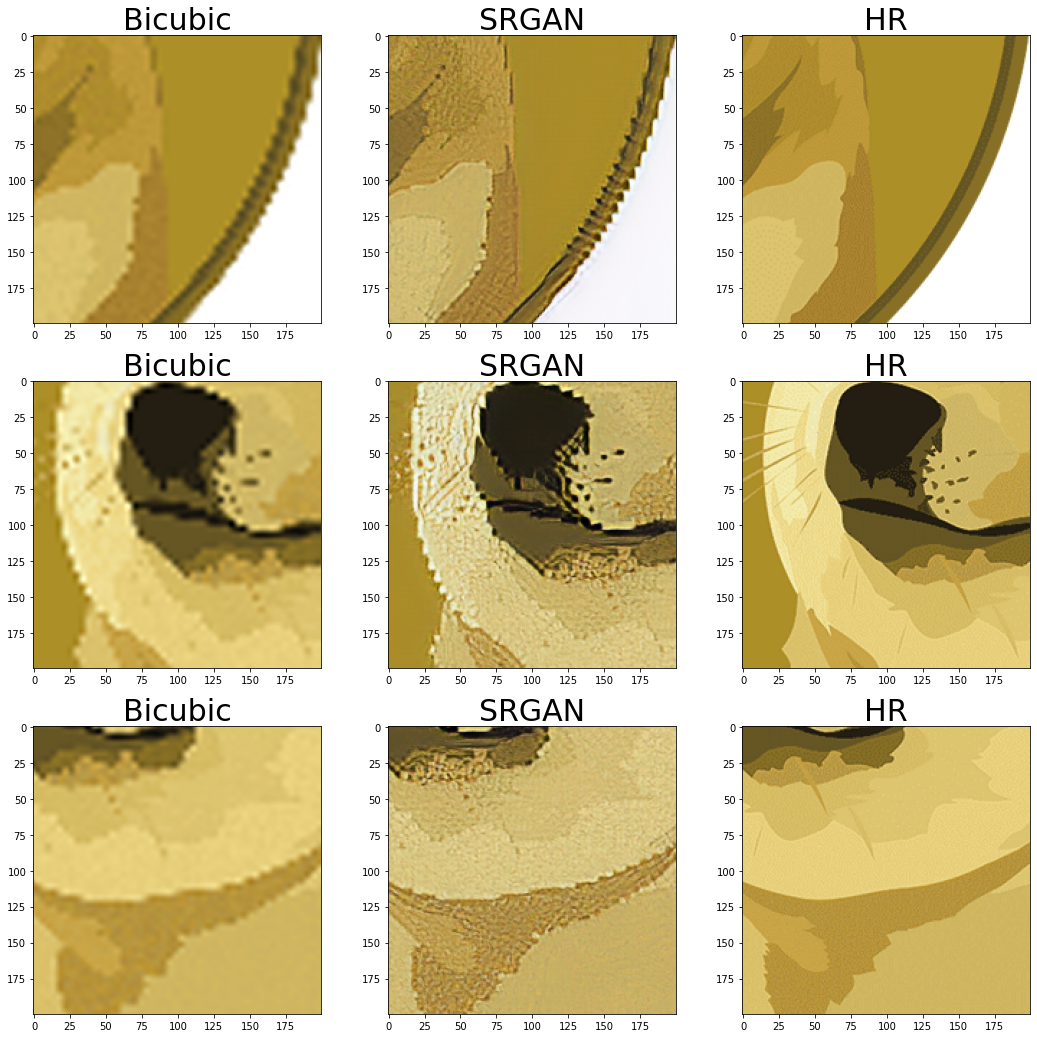

In [ ]:
# 5. 원본, bicubic, srgan 시각화

# 이미지의 특정 부분을 잘라내는 함수
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

left_tops = [(400,500), (300,100), (400,200)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_img1, left_top, 200, 200)
    img2 = crop(srgan_img1, left_top, 200, 200)
    img3 = crop(org_img1, left_top, 200, 200)
    images.extend([img1, img2, img3])

labels = ["Bicubic", "SRGAN", "HR"] * 3

plt.figure(figsize=(18,18))
for i in range(9):
    plt.subplot(3,3,i+1) 
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i], fontsize=30)

### Report:

#### 생각보다 결과가 잘나왔습니다.  Bicubic, SRCNN, HR 이 3개를 비교 한다면 진짜 확 차이가 많이 난다. 색가보다 resolution 중요성이 보인다. 

# Project One-Two: 낮은 해상도 이미지 TEST

(706, 706, 3)


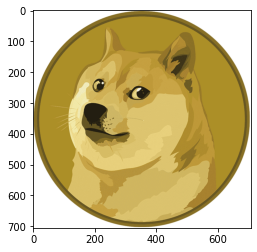

In [ ]:
# 1. 이미지 불러오기
org_img2_path = os.getenv('HOME') + '/aiffel/super_resolution/dogecoin.png'
org_img2 = cv2.imread(org_img2_path)

print(org_img2.shape)
plt.imshow(cv2.cvtColor(org_img2, cv2.COLOR_BGR2RGB))

(2824, 2824, 3)


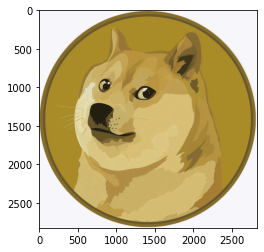

In [ ]:
# 2. SRGAN을 이용해 고해상도 이미지 생성
srgan_img2 = apply_srgan(org_img2)

# 고해상도 이미지 시각화
print(srgan_img2.shape)
plt.imshow(cv2.cvtColor(srgan_img2, cv2.COLOR_BGR2RGB))


(2824, 2824, 3)


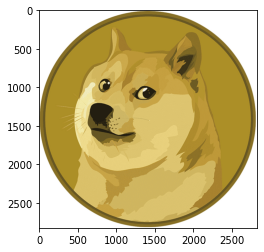

In [ ]:
# 3. bicubic interpolation 적용하여 4배로 늘림
bicubic_img2 = cv2.resize(
    org_img2, 
    dsize=(org_img2.shape[1]*4, org_img2.shape[0]*4),
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

print(bicubic_img2.shape)
plt.imshow(cv2.cvtColor(bicubic_img2, cv2.COLOR_BGR2RGB))

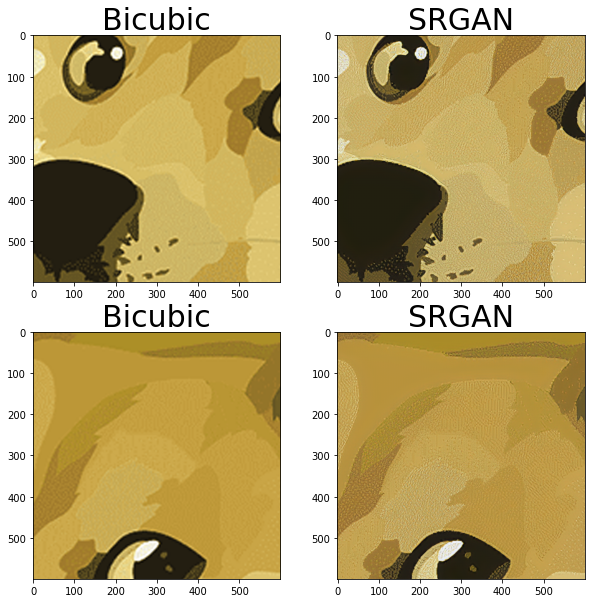

In [ ]:
# 4. bicubic, srgan 시각화

# 이미지의 특정 부분을 잘라내는 함수
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

left_tops = [(900,700), (500,1100)]

images = []
for left_top in left_tops:
    img1 = crop(bicubic_img2, left_top, 600, 600)
    img2 = crop(srgan_img2, left_top, 600, 600)
    images.extend([img1, img2])

labels = ["Bicubic", "SRGAN"] * 3

plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1) 
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(labels[i], fontsize=30)

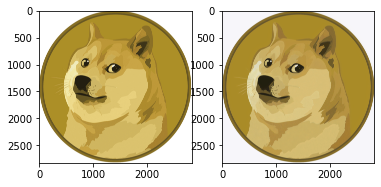

In [ ]:
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(bicubic_img2, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(srgan_img2, cv2.COLOR_BGR2RGB))

### Report:

#### 생각 보다 DOGECOIN 차이가 많이 없다. 

# Project Two: SRGAN을 이용해 고해상도 GIF 생성해보기 

## 1. GIF FILE 불러오기 

In [ ]:
import cv2

# 다운받은 파일의 경로를 설정해 주세요.
gif_path = os.getenv('HOME') + '/aiffel/super_resolution/dogecoin1.gif'
gif = cv2.VideoCapture(gif_path)

isTrue = True
frames = []
while isTrue:
    isTrue, frame = gif.read()
    if isTrue:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame)

print("frame 수 :", len(frames))
print("frame 크기 :", (frames[0].shape))

frame 수 : 56
frame 크기 : (500, 500, 3)


## 2. FRAME Super DUPER Resolution 진행하기


In [ ]:
# Bicubic
bicubic_frames = [cv2.resize(
    frame,
    dsize=(frame.shape[1]*4, frame.shape[0]*4),
    interpolation=cv2.INTER_CUBIC
) for frame in frames]
bicubic_frames[0].shape    

(2000, 2000, 3)

In [ ]:
# SRGAN
srgan_frames = [apply_srgan(frame) for frame in frames]
srgan_frames[0].shape

(2000, 2000, 3)

## 3. FRAME 합쳐서 GIF 만들기

In [ ]:
import imageio

imageio.mimsave('bicubic_frames.gif', bicubic_frames)
imageio.mimsave('srgan_frames.gif', srgan_frames)

## 4. 주피터 노트북에 GIF 표시하기

### 생각 보다 GIF 사진이 너무 커서 작에 줄였습니다! 너무 크면 골란합니다

In [ ]:
from IPython.display import Image as show_gif

show_gif(gif_path, width=300)

NameError: ignored

# 알에 보이는게 그 "GIF"입니다. 일부로 오류나게했습니다. 너무 사이즈가 커서 GITHUB NONO~

이거 일부로 한거에요! 너무 큼.. GIF..
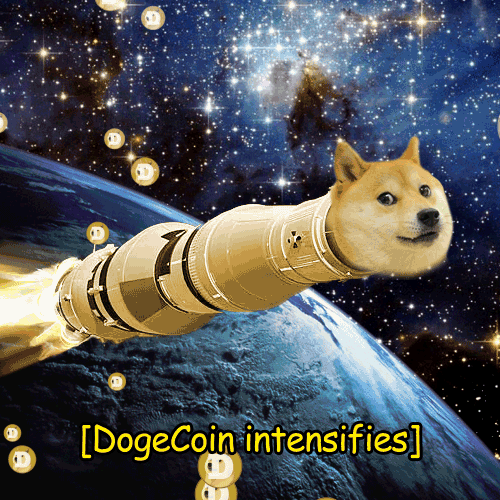


In [ ]:
show_gif("bicubic_frames.gif", width=300)

In [ ]:
show_gif("srgan_frames.gif", width=300)

### RESULT:
#### 떡상하는 속가 너무 느려진다... BICUBIC 속도는 거의 DOGECOIN 망했을때. 원본이 내가 원했던 코인 떡상이였는데. ㅋㅋㅋㅋ 인제 거지인 DEVELOPER..